In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## 1.1 Just do one big experiment

In [26]:
 # First we'll generate the points we're interested in for many repeated experiments.
dimension = 2
n_experiments = 1
n_points_per_experiment = 10000
points = np.random.uniform(low=-1.0, high=1.0, size=(dimension, n_points_per_experiment, n_experiments, ))

In [27]:
# Next, check whether the points are in the circle
radius = (points**2).sum(axis=0)
inside_the_circle = (radius <= 1)
inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) & (-1.0 <= points[1]) & (points[1] <= 1.0))
pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
pi = 4 * pi_by_4

In [39]:
average = pi.mean()
uncertainty = pi.std()
print(f'={average} ± {uncertainty}')

=3.128 ± 0.0


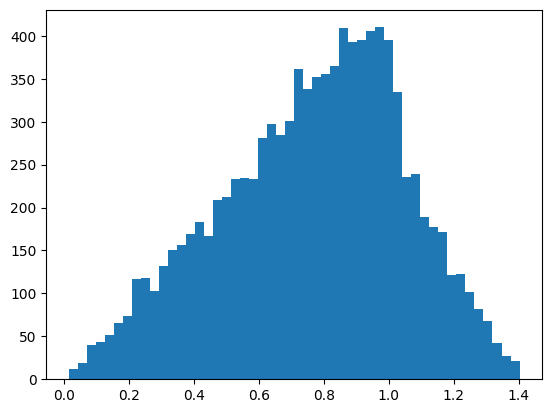

In [24]:
plt.hist(radius**0.5, bins=50)
plt.show()

The Histogram is skewed left. This means there are more binned points on the left of the maximum (approximately 1) than on the right. This results from the square root function which increases sharply in the beginning and the gradient of the function decreases for higher n. 

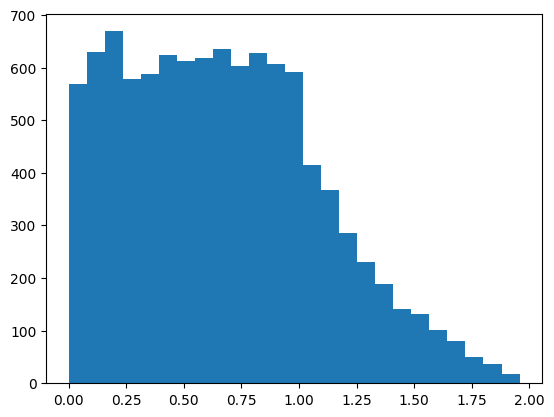

In [42]:
plt.hist(radius, bins=25)
plt.show()

**Explaination:** 
???

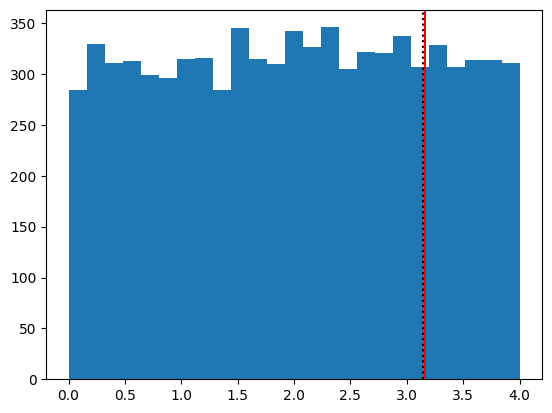

In [7]:
mask = radius <= 1
indicator = 4*radius[mask]

plt.hist(indicator, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(average, color='red', zorder=1)
plt.axvspan(average-uncertainty, average+uncertainty, alpha=0.25)
plt.show()

## 1.2 Split into 100 experiments

In [100]:
def sample(n_experiments, n_points_per_experiment):
    points = np.random.uniform(low=-1.0, high=1.0, size=(dimension, n_points_per_experiment, n_experiments, ))
    return points

def find_pi(points):
    radius = (points**2).sum(axis=0)
    inside_the_circle = (radius <= 1)
    inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) & (-1.0 <= points[1]) & (points[1] <= 1.0))
    pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
    pi = 4 * pi_by_4
    return pi

def estimate(pi, n_experiments):
    average = np.sum(pi)/(n_experiments)
    uncertainty = np.sqrt(np.sum(pi-average)**2/(n_experiments-1))
    return average, uncertainty

In [101]:
n_experiments_2 = 100
n_points_per_experiment_2 = 100

points_2 = sample(n_experiments_2, n_points_per_experiment_2)
pi_2 = find_pi(points_2)
average_2, uncertainty_2 = estimate(pi_2, n_experiments_2)
print(f'={average_2} ± {uncertainty_2}')

=3.1431999999999998 ± 2.3655301810138523e-15


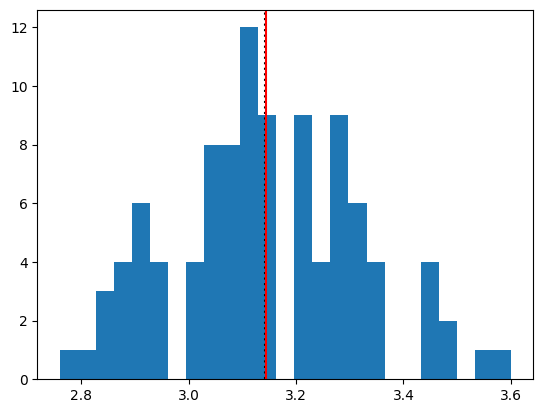

In [102]:
plt.hist(pi_2, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(average_2, color='red', zorder=1)
plt.axvspan(average_2-uncertainty_2, average_2+uncertainty_2, alpha=0.25)

## 1.3 A Zillion Little Experiments

In [103]:
n_experiments_3 = 10000
n_points_per_experiment_3 = 1

points_3 = sample(n_experiments_3, n_points_per_experiment_3)
pi_3 = find_pi(points_3)
print(np.unique(pi_3))
average_3, uncertainty_3 = estimate(pi_3, n_experiments_3)
print(f'={average_3} ± {uncertainty_3}')

[0. 4.]
=3.1368 ± 5.9688574307178226e-15


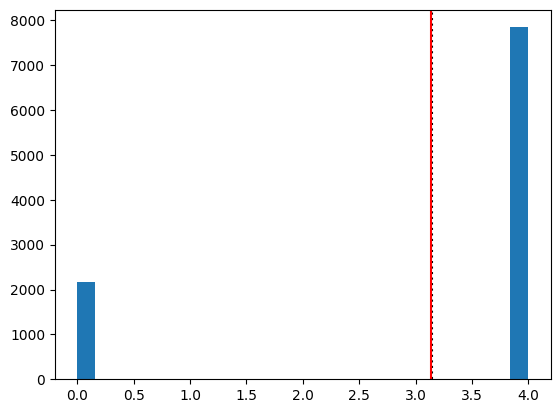

In [104]:
plt.hist(pi_3, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(average_3, color='red', zorder=1)
plt.axvspan(average_3-uncertainty_3, average_3+uncertainty_3, alpha=0.25)

**Explaination** 
Its observable that we either get 4 (the square area) as result or 0 in a bin relation of $\pi$/4. However, due 


## 1.4 Stop and think

## 1.5 More Experiments vs. Longer Experiments

In [105]:
P = np.array([10, 100, 1000, 10000])
X = np.array([10, 100, 1000, 10000])
pi_estimates = np.zeros(16)
pi_uncertainties = np.zeros(16)

counter_1 = 0
for i in range(0, 4):
    counter_2 = 0
    for j in range(0, 4):
        sampled_data = sample(X[i], P[j])
        pi_value, uncertainty_value = estimate(find_pi(sampled_data), X[i])
        pi_estimates[counter_1 + counter_2] = pi_value
        pi_uncertainties[counter_1 + counter_2] = uncertainty_value
        counter_2 += 1
    counter_1 += 4

print("pi_estimates:", pi_estimates)
print("pi_uncertainties:", pi_uncertainties)


pi_estimates: [3.16      3.14      3.1252    3.14812   3.068     3.1588    3.1406
 3.141064  3.1332    3.14408   3.142632  3.1417588 3.14344   3.140724
 3.1415276 3.1418804]
pi_uncertainties: [2.96059473e-16 2.96059473e-16 1.03620816e-15 1.48029737e-16
 3.97230540e-15 6.96269261e-15 6.69489674e-16 8.03387609e-16
 1.28701305e-14 8.09300783e-15 7.81200061e-15 2.32814479e-14
 1.63433001e-15 3.97568540e-14 1.90701442e-14 2.04113607e-14]


In [106]:
final_pi, final_uncertainty = estimate(pi_estimates, 16)
print(f'={final_pi} ± {final_uncertainty}')

=3.138189175 ± 6.879800455918813e-16


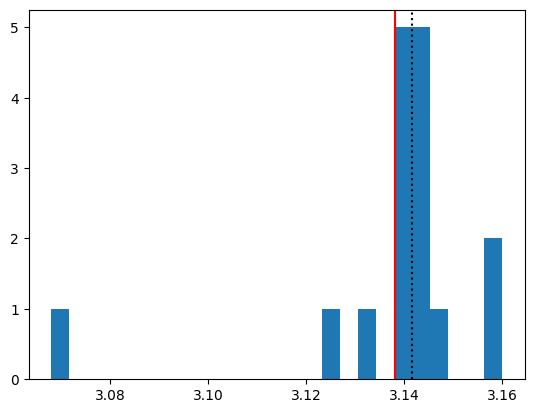

In [107]:
plt.hist(pi_estimates, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(final_pi, color='red', zorder=1)
plt.axvspan(final_pi-final_uncertainty, final_pi+final_uncertainty, alpha=0.25)

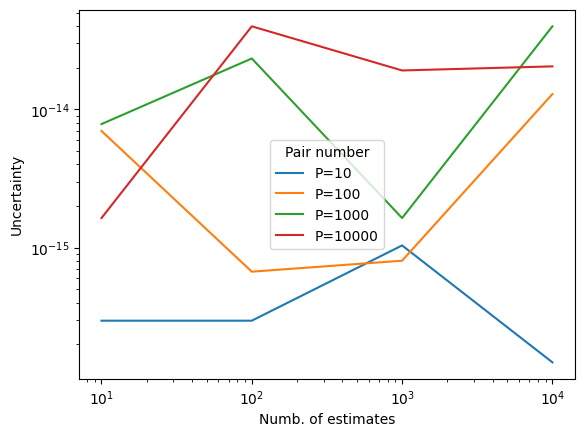

In [108]:
plt.loglog(X,pi_uncertainties[:4],label=f'P={P[0]}')
plt.loglog(X,pi_uncertainties[5:9],label=f'P={P[1]}')
plt.loglog(X,pi_uncertainties[10:14],label=f'P={P[2]}')
plt.loglog(X,pi_uncertainties[-4:],label=f'P={P[3]}')

plt.ylabel('Uncertainty')
plt.xlabel('Numb. of estimates')
plt.legend(title="Pair number")


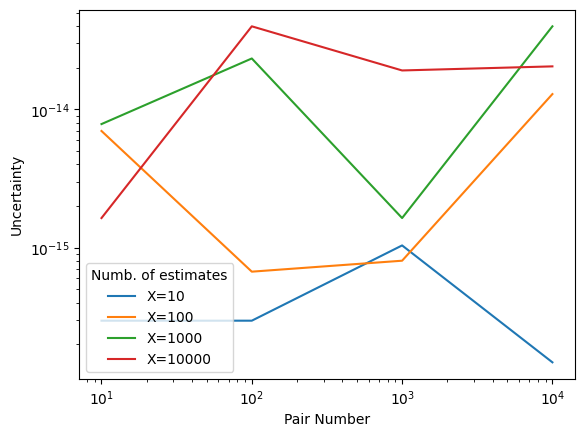

In [110]:
plt.loglog(P,pi_uncertainties[:4],label=f'X={X[0]}')
plt.loglog(P,pi_uncertainties[5:9],label=f'X={X[1]}')
plt.loglog(P,pi_uncertainties[10:14],label=f'X={X[2]}')
plt.loglog(P,pi_uncertainties[-4:],label=f'X={X[3]}')

plt.ylabel('Uncertainty')
plt.xlabel('Pair Number')
plt.legend(title="Numb. of estimates")